---
---
# **`CASE STUDY - 1` :: Healthcare Provider Fraudulent Detection**

<img src="Display_Pic.png" alt="drawing" width="950"/>

---
---


**This notebook contains the feature engineering :-**
   - **Basic features +**
   - **Aggregated features at a single level +**
   - **Aggregated features based on interaction b/w multiple levels +**
   - **First cut models trained on above created features**


**Above steps are performed on the publicly available dataset at [Kaggle](https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis) with the intent:**
- To introduce features which can help us to uncover the potential hidden patterns.
- To do more accurate and error free classification of false cases.


**Kindly checkout below link for gaining BUSINESS related insights related to this problem ::**

- [Deck : Detailed Explanation](https://docs.google.com/presentation/d/1Thuw_eZskafkl9W3xYuEVsjgTJKFeEkzEfAmczH96Uw/)


**Kindly checkout below link for TECHNICAL design document ::**

- [Technical Document](https://docs.google.com/document/d/10z9xbn4dZWkforlAszCDaa1M0roAW-MOf2pjJHSnEXk/)


**Kindly checkout below link for In-depth Description and Reasoning of all the Features ::**

- [Features Description](https://docs.google.com/spreadsheets/d/1ktwjad3U-hGT_7yccGyZC4AzGhWAMs3RHrIMk8Gi8xQ/)

# **`Notebook Contents`**

>[CASE STUDY - 1 :: Healthcare Provider Fraudulent Detection](#scrollTo=naPWqtUVigTd)

>[Notebook Contents](#scrollTo=PHkkU2ExpgPR)

>>[Downloading_Train_Data_Files](#scrollTo=Ry-TJ1anmAdO)

>>[Importing_Libraries](#scrollTo=ThPD8j4PnuVH)

>>[Importing_Dataset](#scrollTo=c16_htZKnucm)

>>[Exploring_Target_Labels_Data](#scrollTo=25UO_fXHte6_)

>>>[Adding New Feature - 1 :: Admitted or Not Admitted indicator in IP and OP Dataset](#scrollTo=UzS9VJNVXA42)

>>>[Merging the Datasets](#scrollTo=yS_zDW4FXA46)

>>>[Merging the IP_OP Dataset with BENE Data](#scrollTo=C-2lOdqSXA48)

>>>[Merging the IP_OP_BENE Dataset with PROVIDER level Tgt Labels Data](#scrollTo=GDGBH08qXA49)

>>>[Entire Dataset](#scrollTo=UIcqllzRXA4-)

>>[Feature Engineering](#scrollTo=dO5kzZxUYxEd)

>>>[Adding New Feature - 2 :: Is_Alive?](#scrollTo=Q8NGb3byXA5L)

>>>[Adding New Feature - 3 :: Claim_Duration](#scrollTo=3Jx9IsC2XA5J)

>>>[Adding New Feature - 4 :: Admitted_Duration](#scrollTo=Meku-w63XA5K)

>>>[Adding New Feature - 5 :: Bene_Age](#scrollTo=n_WDPpDOXA5N)

>>>[Adding New Feature - 6 :: Att_Opr_Oth_Phy_Tot_Claims](#scrollTo=T1NQk3UWYxEp)

>>>[Adding New Feature - 7 :: Prv_Tot_Att_Opr_Oth_Phys](#scrollTo=VBjTHMKCYxE5)

>>>[Adding New Feature - 8 :: Total Unique Claim Admit Codes used by a PROVIDER](#scrollTo=txQdFlDmYxFF)

>>>[Adding New Feature - 9 :: Total Unique Number of Diagnosis Group Codes used by a PROVIDER](#scrollTo=qPk20RCSYxFZ)

>>>[Adding New Feature - 10 :: Total unique Date of Birth years of beneficiaries provided by a Provider](#scrollTo=jyG5igPHYxFb)

>>>[Adding New Feature - 11 :: Sum of patients age treated by a Provider](#scrollTo=FsgyP-fRYxFe)

>>>[Adding New Feature - 12 :: Sum of Insc Claim Re-Imb Amount for a Provider](#scrollTo=FuPQ5VE9YxFg)

>>>[Adding New Feature - 13 :: Total number of RKD Patients seen by a Provider](#scrollTo=xK38bGKFYxFh)

>>>[Adding Aggregated Features :: For every possible level](#scrollTo=0uoiEEnDYxFo)

>>>[Adding Aggregated Features :: Based on various combinations of different levels in order to introduce their interactions in the dataset.](#scrollTo=C9bseqGRYxFs)

>>[Entire Data Aggregation :: At provider level](#scrollTo=aA19z2SuYxF7)

>>[Data Segregation :: Creating separate sets of independent features and target column.](#scrollTo=Af9an9wSYxF9)

>>[Train Test Split :: Creating TRAIN and VALIDATION sets.](#scrollTo=VD2vxhwLYxGD)

>>[Standardizing the TRAIN & TEST sets :: Bringing every feature into the same scale.](#scrollTo=tEI7U2krYxGH)

>>[Baseline Model Training](#scrollTo=z532QrJwYxGI)

>>>[Using Class Weighting Scheme](#scrollTo=rJLrpM66qKvk)

>>>>[1. Logistic Regression](#scrollTo=zAD9I_AlYxGJ)

>>>>[2. Decision Tree](#scrollTo=b8f1bYjgqKvx)

>>>>[3. Random Forest Classifier](#scrollTo=nPY846BaqKv7)

>>>[Using Minority Synthetic Oversampling](#scrollTo=2jOTCZ4MqKwH)

>>>>[Train Test Split :: Creating TRAIN and VALIDATION sets.](#scrollTo=bTJ347vHqKwI)

>>>>[Standardizing the TRAIN & TEST sets :: Bringing every feature into the same scale.](#scrollTo=z7Lf2B-EqKwK)

>>>>[4. Logistic Regression](#scrollTo=WeW0QTFrqKwR)

>>>>[5. Decision Tree](#scrollTo=PlzxckEdqKwX)

>>>>[6. Random Forest Classifier](#scrollTo=ZqTFJ-pmqKwc)

>>[RESULTS](#scrollTo=TyFc6VqIqKwg)

>>[OBSERVATIONS](#scrollTo=M4iM30JdeSL1)

>>>[Referred Links](#scrollTo=CsE4bJmQYxGW)



## **Downloading_Train_Data_Files**

## TRAIN set files
!gdown 12zSQN2FOxmuXFhz2xzPNussPisEfVP5w
!gdown 13XyBakfHiG-BNQPrYFXAHlsOcfICOTpx
!gdown 1dLxl4vkykPcm4Zj0abYR0Ohr7STQHg-1
!gdown 1rFER-7VuYb7GfCYeJrfxPidgK0lwqw3R
!gdown 1092Kqiqo1VFhVOgy2ttuW4Vu1pRTEOKp
!gdown 1mmzARIlfF3TkZQljk74bZ6xkl7azyy3K

## **Importing_Libraries**

In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',80)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

## **Importing_Dataset**

In [3]:
train_bene_df = pd.read_csv("Dataset/Train/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("Dataset/Train/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("Dataset/Train/Train_Outpatientdata-1542865627584.csv")
train_tgt_lbls_df = pd.read_csv("Dataset/Train/Train-1542865627584.csv")

## ***Exploring_Target_Labels_Data***

In [4]:
train_tgt_lbls_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


* **Check the Fraud and Non-Fraud Counts**

In [5]:
print("### The unique number of providers are {}. ###".format(train_tgt_lbls_df.shape[0]))

### The unique number of providers are 5410. ###


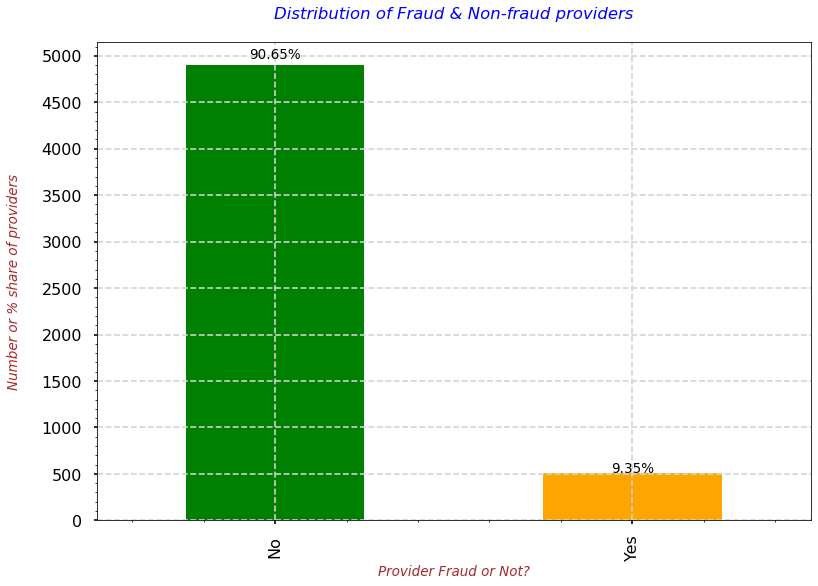

In [6]:
with plt.style.context('seaborn-poster'):
    fig = train_tgt_lbls_df["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_tgt_lbls_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number or % share of providers\n", fontdict=label_font_dict)
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can say that 90% of the providers are not frausters and only 9% of them are involved in frauds.

### **Adding `New Feature - 1` :: `Admitted` or `Not Admitted` indicator in IP and OP Dataset**

* **Adding in IP Dataset**

In [7]:
train_ip_df["Admitted?"] = 1

In [8]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


* **Adding in OP Dataset**

In [9]:
train_op_df["Admitted?"] = 0

In [10]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


### **Merging the Datasets**

In [11]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [12]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [13]:
train_ip_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


### **Merging the IP_OP Dataset with BENE Data**

In [14]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

### **Merging the IP_OP_BENE Dataset with PROVIDER level Tgt Labels Data**

In [15]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

### **Entire Dataset**

In [16]:
train_iobp_df.shape

(558211, 56)

In [17]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [18]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

In [19]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


- **Fraud Count at Claims level**

     PotentialFraud
No           345415
Yes          212796 



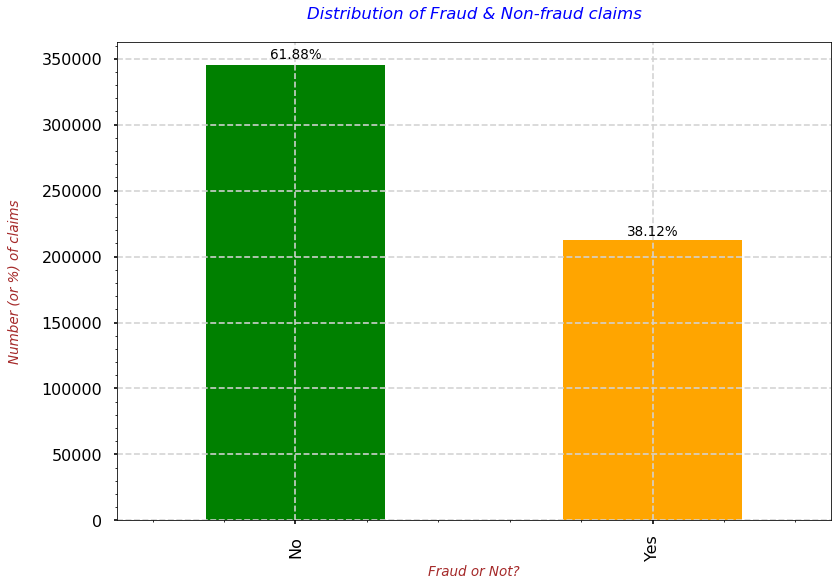

In [20]:
print(pd.DataFrame(train_iobp_df['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobp_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of claims\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us that, 62% of claims are Non-Fraud and 32% of them are Fraudulent. 
    * By looking at the percentages we may say that there is a class-imbalance problem but after looking at the number of records it doesn't seem to be a severe class-imbalance problem. 
        * So, I'll try some class balancing techniques only after training a baseline model w/o any synthetic or class weighting techniques.

## **Feature Engineering**
**`Let's create some features`**

### **Adding `New Feature - 2` :: `Is_Alive?`**

    - Is Alive? = No if DOD is NaN else Yes

In [21]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [22]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [23]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

### **Adding `New Feature - 3` :: `Claim_Duration`**
    
    - Claim Duration = Claim End Date - Claim Start Date

In [24]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

### **Adding `New Feature - 4` :: `Admitted_Duration`**

    - Admitted Duration = Discharge Date - Admission Date

In [25]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

### **Adding `New Feature - 5` :: `Bene_Age`**

    - Bene Age = DOD - DOB (if DOD is Null then replace it with MAX date in DOD)

In [26]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [27]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

### **Adding `New Feature - 6` :: `Att_Opr_Oth_Phy_Tot_Claims`**
    
   * It represents the total claims submitted by Attending, Operating and Other Physicians.
       
       * **`Reasoning`** :: The idea behind adding this feature is to see whether a total of physicians claims submission will help in influencing the potential frauds.


   * **`Logic`** :: Att_Phy_tot_claims + Opr_Phy_tot_claims + Oth_Phy_tot_claims

- **`Att_Phy_tot_claims`** :: **Total Number of claims or cases seen by Attending Physician**

In [28]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(train_iobp_df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 82063


In [29]:
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

- **`Opr_Phy_tot_claims`** :: **Total Number of claims or cases seen by Opearting Physician**

In [30]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 35315


In [31]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

- **`Oth_Phy_tot_claims`** :: **Total Number of claims or cases seen by Other Physician**

In [32]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(train_iobp_df['OtherPhysician'].nunique()))

Unique number of Other Physicians present in the dataset are --> 46457


In [33]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [34]:
# Creating the combined feature
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

In [35]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [36]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [37]:
train_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

### **Adding `New Feature - 7` :: `Prv_Tot_Att_Opr_Oth_Phys`**
    
   * It represents the total of all kind of physicians that a provider has interacted with.
       
       * **`Reasoning`** :: The idea behind adding this feature is to see whether a fraudulent provider interacts with higher or lower numberof of various physicians.


   * **`Logic`** :: Prv_Tot_Att_Phy + Prv_Tot_Opr_Phy + Prv_Tot_Oth_Phy

In [38]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [39]:
# Nulls in the above features
train_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [40]:
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

* The average number of attending physicians for providers are 820.

In [41]:
train_iobp_df["Prv_Tot_Opr_Phy"].describe()

count    558211.000000
mean        155.030023
std         228.266693
min           0.000000
25%          25.000000
50%          73.000000
75%         185.000000
max        1441.000000
Name: Prv_Tot_Opr_Phy, dtype: float64

* The average number of operating physicians for providers are 155.

In [42]:
train_iobp_df["Prv_Tot_Oth_Phy"].describe()

count    558211.000000
mean        306.781194
std         497.246984
min           0.000000
25%          37.000000
50%         120.000000
75%         381.000000
max        3209.000000
Name: Prv_Tot_Oth_Phy, dtype: float64

* The average number of other physicians for providers are 306.

In [43]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [44]:
train_iobp_df["Prv_Tot_Att_Opr_Oth_Phys"].describe()

count    558211.000000
mean       1282.017685
std        1993.415913
min           1.000000
25%         192.000000
50%         560.000000
75%        1567.000000
max       12857.000000
Name: Prv_Tot_Att_Opr_Oth_Phys, dtype: float64

In [45]:
train_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

### **Adding `New Feature - 8` :: `Total Unique Claim Admit Codes used by a PROVIDER`**
   
   * **`Reasoning`** :: The idea behind adding this feature is to see how many unique number of `Claim Admit Diagnosis Codes` used by the Provider. 
       * As there may be a pattern that if a provider has used so many Admit Diagnosis Codes then it might increases or decreases the chances of fraud.

In [46]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [47]:
train_iobp_df["PRV_Tot_Admit_DCodes"].describe()

count    558211.000000
mean        109.227258
std         112.083238
min           0.000000
25%          28.000000
50%          72.000000
75%         152.000000
max         582.000000
Name: PRV_Tot_Admit_DCodes, dtype: float64

### **Adding `New Feature - 9` :: `Total Unique Number of Diagnosis Group Codes used by a PROVIDER`**
   
   * **`Reasoning`** :: The idea behind adding this feature is to see how many unique `Diagnosis Group Codes` used by the Provider.
       * As there may be a pattern that if a provider has used so many Diagnosis Group Codes then it might increases or decreases the chances of fraud.

In [48]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [49]:
train_iobp_df["PRV_Tot_DGrpCodes"].describe()

count    558211.000000
mean         22.234648
std          46.571715
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max         330.000000
Name: PRV_Tot_DGrpCodes, dtype: float64

### **Adding `New Feature - 10` :: `Total unique Date of Birth years of beneficiaries provided by a Provider`**
   
   * **`Reasoning`** :: The idea behind adding this feature is that if a provider has very high variability in the year of birth of patients then that might be one of the signs of medicare frauds.
       - Because generally private hospitals who treat poor patients make false claims on their names. For example, Nazia is 10 years old. But, according to a claim filed by Chhattisgarh-based Shaheed Hospital with the Rashtriya Swasthya Bima Yojna (RSBY), she has delivered a baby after a caesarean operation. Mukul (name changed) is only 7. But Agarwal Hospital, Raipur, has made a claim for removing cataract from his eyes.

Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/private-hospitals-perform-fake-surgeries-to-claim-thousands-in-insurance-cover/articleshow/16934229.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

In [50]:
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year

In [51]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [52]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [53]:
train_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

### **Adding `New Feature - 11` :: `Sum of patients age treated by a Provider`**
   
   * **`Reasoning`** :: The idea behind adding this feature is that there might be a pattern like if the sum of patients age treated by a provider is very high or low then it might influence the fraud.

In [54]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')

In [55]:
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count    558211.000000
mean      60903.124044
std       95028.202759
min          34.300000
25%        9007.200000
50%       26310.800000
75%       74869.500000
max      617454.100000
Name: PRV_Bene_Age_Sum, dtype: float64

### **Adding `New Feature - 12` :: `Sum of Insc Claim Re-Imb Amount for a Provider`**
   
   * **`Reasoning`** :: The idea behind adding this feature is that there might be a pattern like if the sum of claim re-imb amount for a provider is very high or low then it might influence the fraud.

In [56]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [57]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

### **Adding `New Feature - 13` :: `Total number of RKD Patients seen by a Provider`**
   
   * **`Reasoning`** :: The idea behind adding this feature is that there might be a pattern like if the total number of RKD Patients seen by a Provider is very high or low then it might influence the fraud.

In [58]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [59]:
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [60]:
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [61]:
# Dropping these 2 columns as there 99% of values are same
train_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)

In [62]:
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)

In [63]:
train_iobp_df.shape

(558211, 66)

### **Adding `Aggregated Features` :: For every possible level**
    - Provider
    - Beneficiary
    - Attending Physician
    - Operating Physician
    - Other Physician and etc..
   
   
   * **`Reasoning`** :: The idea behind adding the aggregated features at different levels is that fraud can be done by an individual or group of individuals or entities involved in the claim process.

In [64]:
# PRV Aggregate features
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [65]:
def create_agg_feats(grp_col, feat_name, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    train_iobp_df[feat_1] = train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    train_iobp_df[feat_2] = train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    train_iobp_df[feat_3] = train_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    train_iobp_df[feat_4] = train_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    train_iobp_df[feat_5] = train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    train_iobp_df[feat_6] = train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    train_iobp_df[feat_7] = train_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    train_iobp_df[feat_8] = train_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)

In [66]:
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")

In [67]:
# Dropping these 3 columns as there 99% of values are same
train_iobp_df.drop(['ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [68]:
# Diagnosis Codes columns
create_agg_feats(grp_col='ClmDiagnosisCode_1', feat_name="Claim_DiagCode1")
create_agg_feats(grp_col='ClmDiagnosisCode_2', feat_name="Claim_DiagCode2")
create_agg_feats(grp_col='ClmDiagnosisCode_3', feat_name="Claim_DiagCode3")
create_agg_feats(grp_col='ClmDiagnosisCode_4', feat_name="Claim_DiagCode4")
create_agg_feats(grp_col='ClmDiagnosisCode_5', feat_name="Claim_DiagCode5")
create_agg_feats(grp_col='ClmDiagnosisCode_6', feat_name="Claim_DiagCode6")
create_agg_feats(grp_col='ClmDiagnosisCode_7', feat_name="Claim_DiagCode7")
create_agg_feats(grp_col='ClmDiagnosisCode_8', feat_name="Claim_DiagCode8")
create_agg_feats(grp_col='ClmDiagnosisCode_9', feat_name="Claim_DiagCode9")
create_agg_feats(grp_col='ClmDiagnosisCode_10', feat_name="Claim_DiagCode10")

# Medical Procedure Codes columns
create_agg_feats(grp_col='ClmProcedureCode_1', feat_name="Claim_ProcCode1")
create_agg_feats(grp_col='ClmProcedureCode_2', feat_name="Claim_ProcCode2")
create_agg_feats(grp_col='ClmProcedureCode_3', feat_name="Claim_ProcCode3")

In [69]:
train_iobp_df.shape

(558211, 222)

### **Adding `Aggregated Features` :: Based on various combinations of different levels in order to introduce their interactions in the dataset.**
    - PROVIDER <--> BENE <--> PHYSICIANS
    - PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES
    - PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES
    - PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES
    - PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES
    - PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES
    - PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES
    - PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES and etc..

   * **`Reasoning`** :: The idea behind adding the aggregated features based on the combinations of various features is that many parties or entities might work together to make a medicare fraud. Thus, we need to capture interactions among them to better classify the fraudsters.

In [70]:
# PROVIDER <--> other features :: To get claim counts
train_iobp_df["ClmCount_Provider"]=train_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID"]=train_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_AttendingPhysician"]=train_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OtherPhysician"]=train_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OperatingPhysician"]=train_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=train_iobp_df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_DiagnosisGroupCode"]=train_iobp_df.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_3'])['ClaimID'].transform('count')

In [71]:
train_iobp_df.shape

(558211, 327)

In [72]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [73]:
train_iobp_df.shape

(558211, 299)

In [74]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [75]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive?'] = train_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [76]:
# Encoding the Categorical features
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)

In [77]:
pd.set_option('display.max_rows',310)

In [78]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0
ChronicCond_Cancer,0
ChronicCond_ObstrPulmonary,0
ChronicCond_Depression,0


In [79]:
# Filling Nulls in the aggregated features
train_iobp_df.fillna(value=0, inplace=True)

In [80]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0
ChronicCond_Cancer,0
ChronicCond_ObstrPulmonary,0
ChronicCond_Depression,0


In [81]:
# Checking the Datatypes of the features
train_iobp_df.dtypes

Provider                                                            object
InscClaimAmtReimbursed                                               int64
DeductibleAmtPaid                                                  float64
RenalDiseaseIndicator                                                int64
ChronicCond_Alzheimer                                                int64
ChronicCond_Heartfailure                                             int64
ChronicCond_KidneyDisease                                            int64
ChronicCond_Cancer                                                   int64
ChronicCond_ObstrPulmonary                                           int64
ChronicCond_Depression                                               int64
ChronicCond_Diabetes                                                 int64
ChronicCond_IschemicHeart                                            int64
ChronicCond_Osteoporasis                                             int64
ChronicCond_rheumatoidart

## **Entire Data `Aggregation` :: At provider level**

   * **`Reasoning`** :: The main objective is to predict the `Medicare Provider Fraud`. Thus, here we are grouping the entire dataset at the level of PROVIDER and taking SUM of all the columns to create n-dimensional representation of each provider.

In [82]:
train_iobp_df = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [83]:
train_iobp_df.shape

(5410, 301)

## **`Data Segregation` :: Creating separate sets of independent features and target column.**

   * **`Reasoning`** :: These sets will be used for training the ML Models.

In [84]:
X = train_iobp_df.drop(axis=1, columns=['Provider','PotentialFraud'])
y = train_iobp_df['PotentialFraud']

In [85]:
X.shape, type(X), y.shape, type(y)

((5410, 299), pandas.core.frame.DataFrame, (5410,), pandas.core.series.Series)

In [86]:
X.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,Admitted_Duration,Bene_Age,Att_Opr_Oth_Phy_Tot_Claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_Admit_DCodes,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_Insc_Clm_ReImb_Amt,PRV_Tot_RKD_Patients,PRV_CoPayment,PRV_IP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_ReImb_Amt,PRV_OP_Annual_Ded_Amt,PRV_Admit_Duration,PRV_Claim_Duration,BENE_Insc_ReImb_Amt,BENE_CoPayment,BENE_IP_Annual_ReImb_Amt,BENE_IP_Annual_Ded_Amt,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_7,ClmCount_Provider_BeneID_ClmDiagnosisCode_8,ClmCount_Provider_BeneID_ClmDiagnosisCode_9,ClmCount_Provider_BeneID_ClmDiagnosisCode_10,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Gender_1,Race_2,Race_3,Race_5,Admitted?_1,Is_Alive?_1
0,104640,5340.0,8,15,19,17,5,10,9,21,23,6,8,6,440150,22428,65380,11598,36,25.0,1970.1,100.0,1000,275,125,475,4.925250e+04,2616000,200,133500.0,11003750,560700,1634500,289950,625.0,900,492590,23936.0,3238930,177288,...,3.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,4.0,0.0,0.0,5.0,0.0
1,605670,66286.0,29,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,485,320.0,9245.9,3097.0,26664,7656,7656,5676,1.220459e+06,79948440,3828,8749752.0,131868000,16229136,46664640,12843600,42240.0,64020,1161490,111764.0,6732920,798600,...,55.0,50.0,45.0,5.0,39.0,9.0,0.0,39.0,9.0,0.0,38.0,9.0,0.0,36.0,8.0,0.0,35.0,8.0,0.0,34.0,7.0,0.0,32.0,7.0,0.0,31.0,7.0,0.0,28.0,7.0,0.0,3.0,1.0,0.0,54.0,24.0,0.0,1.0,62.0,1.0
2,52170,310.0,23,64,88,50,16,41,63,105,108,49,46,17,648430,64808,327040,92790,213,0.0,10762.2,1623.0,35611,3725,0,7003,1.603568e+06,7773330,3427,46190.0,96616070,9656392,48728960,13825710,0.0,31737,7798

In [87]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: PotentialFraud, dtype: int64

## **`Train Test Split` :: Creating TRAIN and VALIDATION sets.**

   * **`Reasoning`** :: These sets will be used for measurng the performance of ML Models.

In [88]:
from sklearn.model_selection import train_test_split as tts

In [89]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

In [90]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 299), (1082, 299), (4328,), (1082,))

In [91]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3923
1     405
Name: PotentialFraud, dtype: int64

In [92]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    981
1    101
Name: PotentialFraud, dtype: int64

## **`Standardizing the TRAIN & TEST sets` :: Bringing every feature into the same scale.**

In [93]:
from sklearn.preprocessing import RobustScaler

In [94]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [116]:
# Exporting the files
X_train_std_exp = pd.DataFrame(X_train_std, columns=X.columns)
X_test_std_exp = pd.DataFrame(X_test_std, columns=X.columns)

X_train_std_exp.to_csv("X_train_std.csv")
X_test_std_exp.to_csv("X_test_std.csv")

y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

## **`Baseline Model Training`**

### **`Using Class Weighting Scheme`**

#### **`1. Logistic Regression`**

In [95]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Giving possible values for best hyper-parameter search
possible_values_of_C = np.logspace(-3,3,5)
print("### Values to be searched for C are --> {}\n".format(possible_values_of_C))

# Searching for the best hyper-parameter value
grid={"C":possible_values_of_C, "penalty":["l1","l2"]}
logreg = LogisticRegression(fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                            class_weight='balanced', 
                            n_jobs=-1, 
                            verbose=0, 
                            intercept_scaling=1.0,
                            multi_class='auto',
                            random_state=49)

# Using the ROC AUC as the metric for evaluation of score
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train_std, y_train)

### Values to be searched for C are --> [1.00000000e-03 3.16227766e-02 1.00000000e+00 3.16227766e+01
 1.00000000e+03]



c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          intercept_scaling=1.0, max_iter=500,
                                          n_jobs=-1, random_state=49,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
pd.DataFrame(logreg_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.049509,0.877451,0.014809,0.010128,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.891665,0.928883,0.926288,0.904652,0.918604,0.914018,0.013999,4,0.922360,0.916441,0.915773,0.919979,0.914603,0.917831,0.002888
1,1.572904,0.252193,0.012403,0.009853,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.894393,0.932232,0.932280,0.904762,0.896904,0.912114,0.016798,5,0.921003,0.923822,0.919731,0.922590,0.918403,0.921110,0.001938
2,164.429560,19.562842,0.012114,0.004142,0.0316228,l1,"{'C': 0.03162277660168379, 'penalty': 'l1'}",0.933805,0.949280,0.933255,0.921344,0.879000,0.923337,0.023878,1,0.948058,0.946283,0.945633,0.950127,0.951541,0.948328,0.002240
3,1.421007,0.415022,0.011200,0.002785,0.0316228,l2,"{'C': 0.03162277660168379, 'penalty': 'l2'}",0.890509,0.926193,0.926036,0.904557,0.893503,0.908160,0.015389,7,0.918626,0.921372,0.914508,0.922459,0.922153,0.919824,0.002982
4,2287.849821,830.252727,0.049225,0.038899,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.908909,0.920815,0.889612,0.885629,0.776927,0.876379,0.051350,8,0.962937,0.961995,0.965285,0.965858,0.970386,0.965292,0.002922
5,1.637367,0.339372,0.013820,0.003158,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.898121,0.927499,0.926634,0.902368,0.915927,0.914110,0.012107,3,0.924798,0.921910,0.915118,0.919234,0.910463,0.918305,0.005053
6,2592.658191,880.742827,0.070598,0.029064,31.6228,l1,"{'C': 31.622776601683793, 'penalty': 'l1'}",0.899426,0.918377,0.870520,0.870937,0.783541,0.868560,0.046200,9,0.964352,0.963053,0.968775,0.966526,0.979730,0.968487,0.005949
7,1.478774,0.134471,0.011401,0.001015,31.6228,l2,"{'C': 31.622776601683793, 'penalty': 'l2'}",0.895274,0.925108,0.933318,0.902951,0.914934,0.914317,0.013926,2,0.921877,0.920900,0.920082,0.920316,0.910590,0.918753,0.004128
8,2243.537269,861.287105,0.126675,0.062608,1000,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.899772,0.917984,0.869796,0.875756,0.777195,0.868101,0.048614,10,0.964403,0.963130,0.968959,0.966529,0.980353,0.968675,0.006165
9,1.928563,0.161254,0.019400,0.009416,1000,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.898246,0.927310,0.927703,0.904463,0.888149,0.909174,0.015849,6,0.922278,0.923084,0.916921,0.922722,0.920821,0.921165,0.002257


In [ ]:
# Printing the best score and params values
print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 0.03162277660168379, 'penalty': 'l1'}
roc_auc_score : 0.9233367234603207


In [ ]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train_std, y_train)

LogisticRegression(C=0.0316228, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

In [99]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)", fontdict=label_font_dict)
      plt.ylabel("True Positive Rate(TPR)", fontdict=label_font_dict)
      plt.title("Area Under Curve", fontdict=title_font_dict)
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[0].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[0].set_ylabel("Actual Label", fontdict=label_font_dict)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[1].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[1].set_ylabel("Actual Label", fontdict=label_font_dict)
    
    plt.show()
    
    return train_prediction, test_prediction

In [100]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t

### Train AUC = 0.9471260027127136
### Test AUC = 0.9518373855734198


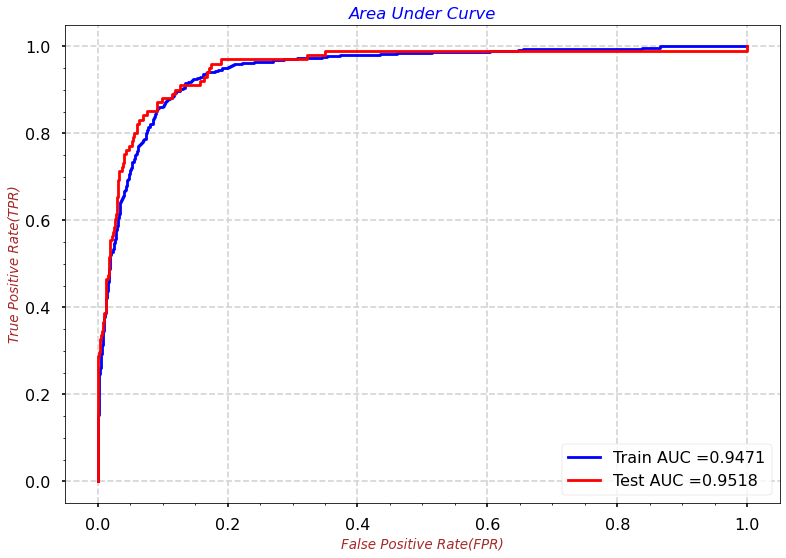

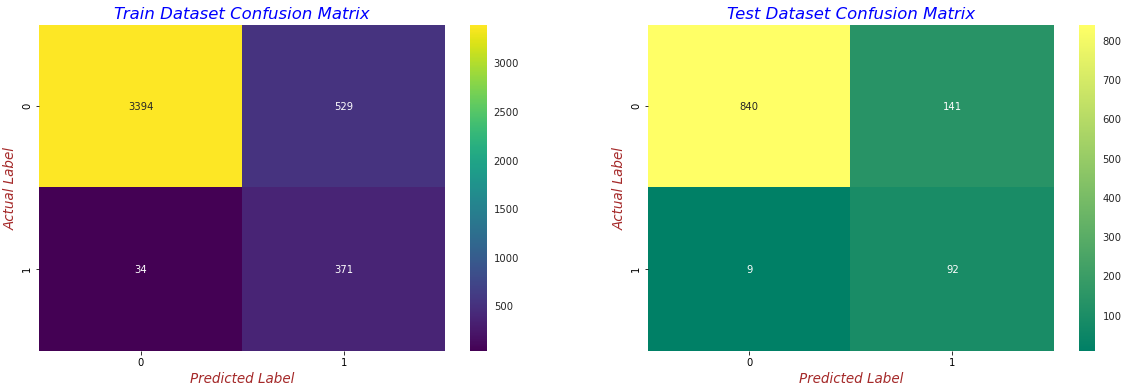



### Best Threshold = 0.3544
### Model AUC is : 0.9518
### Model Train F1 Score is : 0.5686
### Model Test F1 Score is : 0.5509


In [ ]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_1.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.548121
1,Admitted_Duration,0.548848
2,PRV_Tot_DGrpCodes,-0.037874
3,PRV_Tot_Unq_DOB_Years,-0.270709
4,PRV_Bene_Age_Sum,0.054760


In [ ]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [ ]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

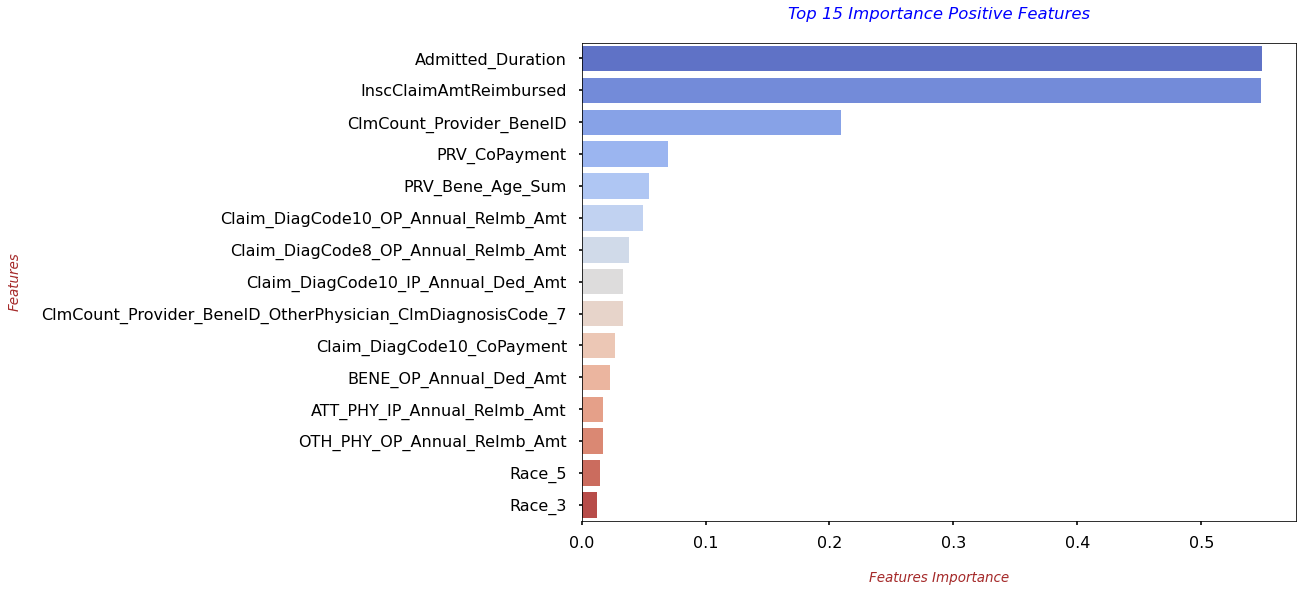

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

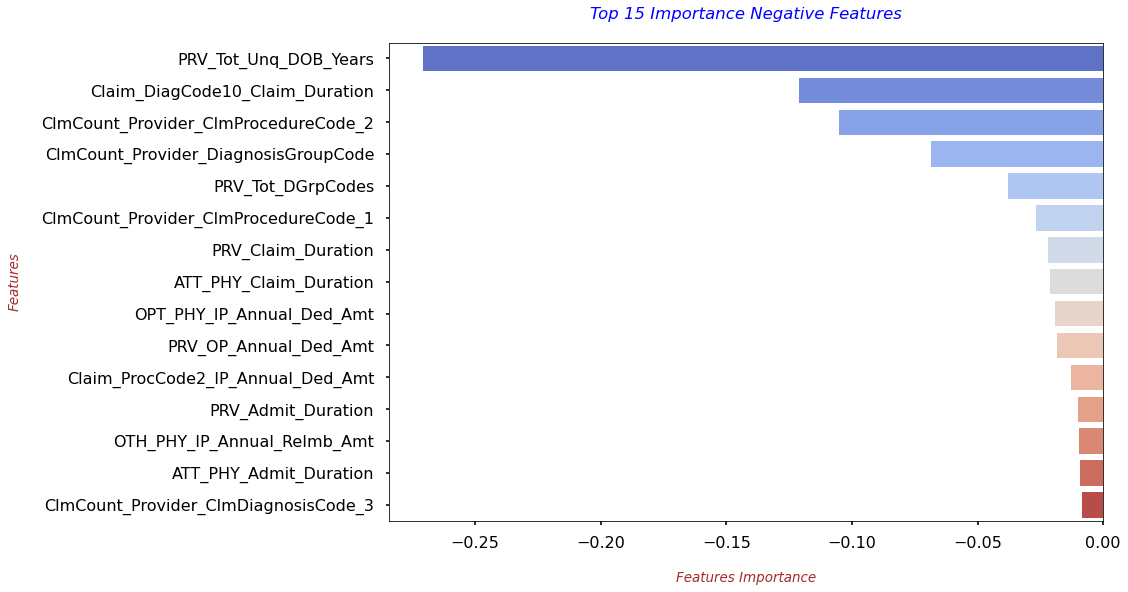

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Negative Features\n", fontdict=title_font_dict)

#### **`2. Decision Tree`**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree = DecisionTreeClassifier(class_weight = 'balanced', random_state=49)

parameters = {'max_depth': [4, 6, 8, 16, 32, 64], 
              'min_samples_split': [10, 50, 100, 150, 250, 500],
              'min_samples_leaf': [10, 50, 100, 150, 250, 500],
              'criterion': ['gini','entropy'],
              'max_features':["auto", "sqrt", "log2"]}

dec_tree_cv = GridSearchCV(dec_tree, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

In [ ]:
dec_tree_cv.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=49),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 16, 32, 64],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 50, 100, 150, 250, 500],
                         'min_samples_split': [10, 50, 100, 150, 250, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
dec_tree_gsrch_results = pd.DataFrame(dec_tree_cv.cv_results_)
dec_tree_gsrch_results.sort_values(by='mean_test_score',ascending=False, inplace=True, axis=0)

In [ ]:
dec_tree_gsrch_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
201,0.088596,0.017281,0.018802,0.012510,gini,6,log2,150,150,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.927580,0.003828
202,0.109397,0.031123,0.006802,0.000747,gini,6,log2,150,250,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.927580,0.003828
200,0.091200,0.011090,0.007798,0.002138,gini,6,log2,150,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.927580,0.003828
199,0.097600,0.010129,0.006999,0.001095,gini,6,log2,150,50,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.927580,0.003828
198,0.074399,0.008957,0.009603,0.002865,gini,6,log2,150,10,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.927580,0.003828
843,0.085257,0.010965,0.008198,0.001464,entropy,6,log2,100,150,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.918581,0.924801,0.931383,0.901801,0.917076,0.918729,0.009862,6,0.938860,0.937397,0.935058,0.935312,0.934096,0.936145,0.001733
842,0.091251,0.007655,0.008802,0.002224,entropy,6,log2,100,100,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.918581,0.924801,0.931383,0.901801,0.917076,0.918729,0.009862,6,0.938860,0.937397,0.935058,0.935312,0.934096,0.936145,0.001733
841,0.096798,0.012605,0.007601,0.001852,entropy,6,log2,100,50,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.918581,0.924801,0.931383,0.901801,0.917076,0.918729,0.009862,6,0.938860,0.937397,0.935058,0.935312,0.934096,0.936145,0.001733
840,0.101400,0.019510,0.011402,0.005002,entropy,6,log2,100,10,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.918581,0.924801,0.931383,0.901801,0.917076,0.918729,0.009862,6,0.938860,0.937397,0.935058,0.935312,0.934096,0.936145,0.001733
196,0.111938,0.029965,0.009600,0.002329,gini,6,log2,100,250,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.916954,0.918055,0.927774,0.913478,0.914761,0.918204,0.005047,10,0.932745,0.928953,0.928550,0.935225,0.931559,0.931406,0.002473


In [ ]:
dec_tree_gsrch_results[dec_tree_gsrch_results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
201,0.088596,0.017281,0.018802,0.012510,gini,6,log2,150,150,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.92758,0.003828
202,0.109397,0.031123,0.006802,0.000747,gini,6,log2,150,250,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.92758,0.003828
200,0.091200,0.011090,0.007798,0.002138,gini,6,log2,150,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.92758,0.003828
199,0.097600,0.010129,0.006999,0.001095,gini,6,log2,150,50,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.92758,0.003828
198,0.074399,0.008957,0.009603,0.002865,gini,6,log2,150,10,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.923913,0.923763,0.926877,0.909754,0.912029,0.919267,0.006966,1,0.927503,0.925827,0.921404,0.931695,0.931469,0.92758,0.003828


In [ ]:
# Printing the best score and params values
print("best parameters = ",dec_tree_cv.best_params_)
print("roc_auc_score :",dec_tree_cv.best_score_)

best parameters =  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 150, 'min_samples_split': 10}
roc_auc_score : 0.9192673253542984


In [ ]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9264832595361951
### Test AUC = 0.9259948930672883


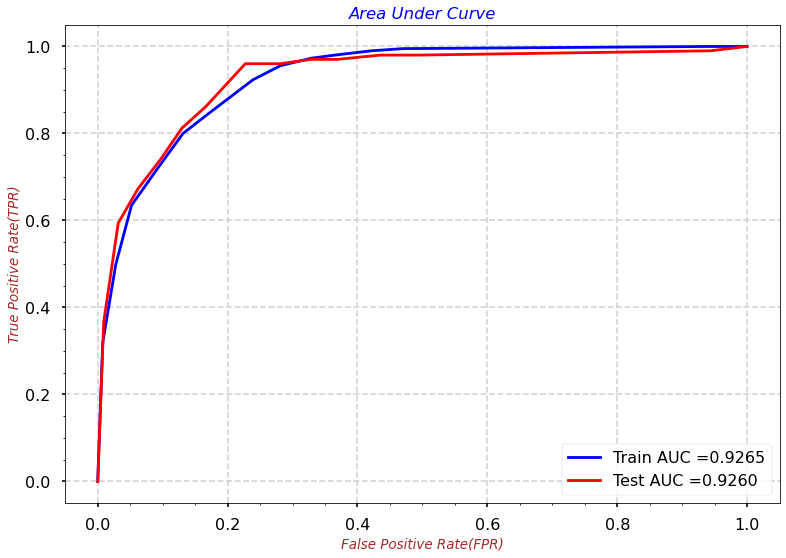

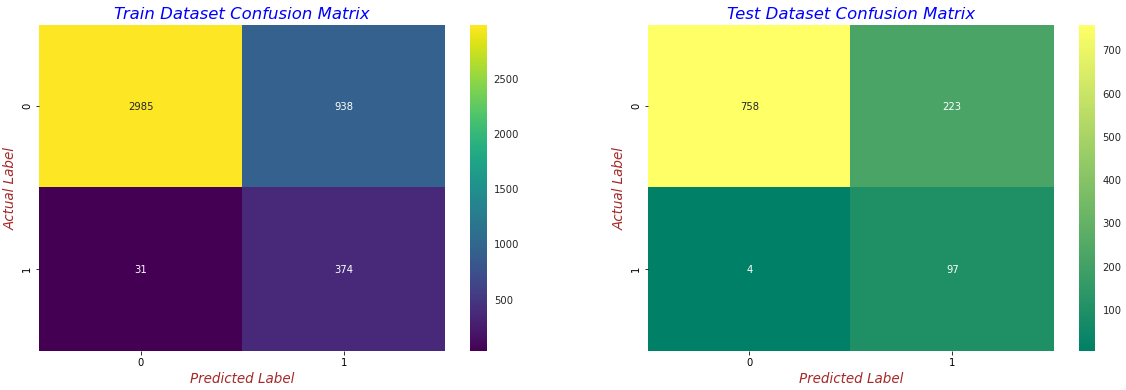



### Best Threshold = 0.5316
### Model AUC is : 0.9260
### Model Train F1 Score is : 0.4356
### Model Test F1 Score is : 0.4608


In [ ]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_2.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,DeductibleAmtPaid,0.040583
1,OPT_PHY_Admit_Duration,0.003299
2,OTH_PHY_Claim_Duration,0.000785
3,Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt,0.700819
4,Claim_Admit_Diag_Code_IP_Annual_Ded_Amt,0.002466


In [ ]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

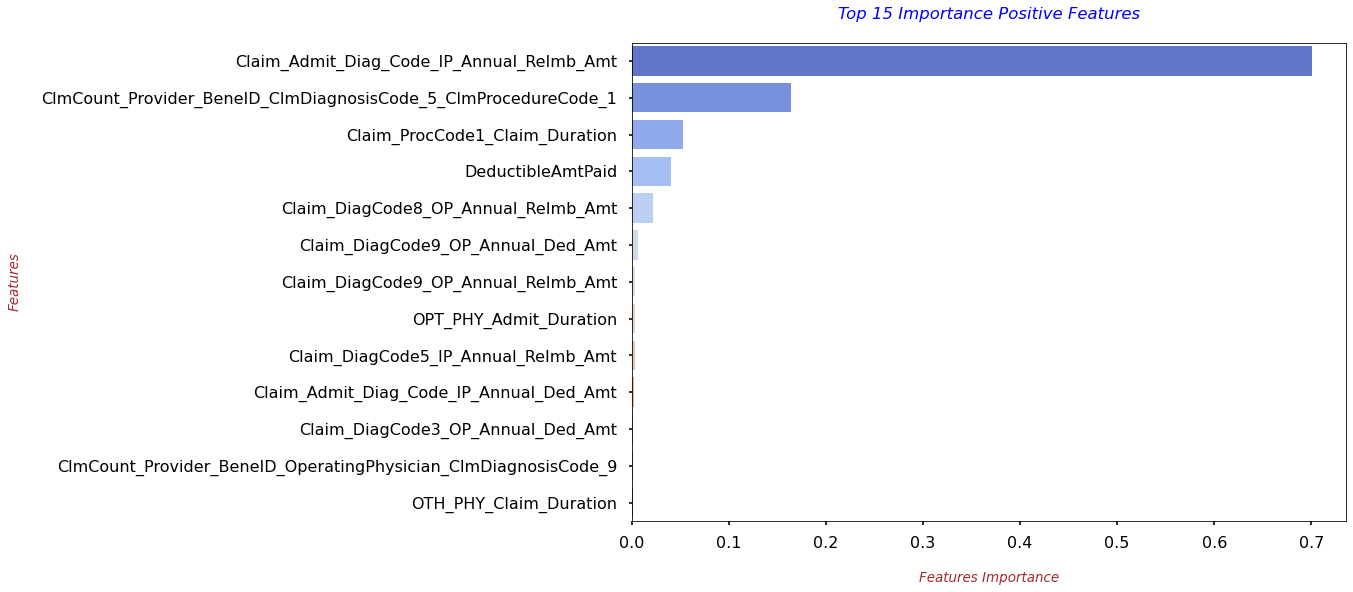

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

#### **`3. Random Forest Classifier`**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(class_weight = 'balanced', random_state=49, oob_score=True)

parameters = {'n_estimators':[30,50,75,100,150,200],
              'max_depth': [4, 6, 8, 16, 32, 64], 
              'min_samples_split': [10, 50, 100, 150, 250, 500],
              'min_samples_leaf': [10, 50, 100, 150, 250, 500],
              'criterion': ['gini','entropy'],
              'max_features':["auto", "sqrt", "log2"]}

rfc_cv = GridSearchCV(rfc, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

In [ ]:
rfc_cv.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True, random_state=49),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 16, 32, 64],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 50, 100, 150, 250, 500],
                         'min_samples_split': [10, 50, 100, 150, 250, 500],
                         'n_estimators': [30, 50, 75, 100, 150, 200]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
rfc_cv_gsrch_results = pd.DataFrame(rfc_cv.cv_results_)
rfc_cv_gsrch_results.sort_values(by='mean_test_score',ascending=False, inplace=True, axis=0)

In [ ]:
rfc_cv_gsrch_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.126604,0.028020,0.032467,0.005636,gini,4,auto,10,10,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.924809,0.940300,0.942219,0.913738,0.932178,0.930649,0.010483,1,0.955263,0.953438,0.952038,0.958248,0.955467,0.954891,0.002097
216,1.069770,0.024257,0.028602,0.005428,gini,4,sqrt,10,10,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.924809,0.940300,0.942219,0.913738,0.932178,0.930649,0.010483,1,0.955263,0.953438,0.952038,0.958248,0.955467,0.954891,0.002097
4110,1.575988,0.073294,0.027704,0.005334,entropy,4,sqrt,10,50,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.924566,0.942109,0.943619,0.913730,0.928209,0.930446,0.011212,3,0.952949,0.952425,0.950600,0.955417,0.954171,0.953112,0.001627
3894,1.443540,0.006330,0.027802,0.005739,entropy,4,auto,10,50,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.924566,0.942109,0.943619,0.913730,0.928209,0.930446,0.011212,3,0.952949,0.952425,0.950600,0.955417,0.954171,0.953112,0.001627
3900,1.539563,0.186634,0.024600,0.002415,entropy,4,auto,10,100,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.923984,0.940992,0.943430,0.913714,0.929201,0.930264,0.010981,5,0.951954,0.950410,0.950110,0.955615,0.953334,0.952285,0.002027
4116,1.390466,0.026865,0.024200,0.002560,entropy,4,sqrt,10,100,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.923984,0.940992,0.943430,0.913714,0.929201,0.930264,0.010981,5,0.951954,0.950410,0.950110,0.955615,0.953334,0.952285,0.002027
228,0.998760,0.021882,0.026200,0.003485,gini,4,sqrt,10,100,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.926445,0.938397,0.943068,0.912525,0.930752,0.930238,0.010579,7,0.951299,0.950210,0.949031,0.954780,0.952389,0.951542,0.001967
12,1.097601,0.038668,0.025599,0.001958,gini,4,auto,10,100,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.926445,0.938397,0.943068,0.912525,0.930752,0.930238,0.010579,7,0.951299,0.950210,0.949031,0.954780,0.952389,0.951542,0.001967
4115,9.282478,0.062017,0.111005,0.011331,entropy,4,sqrt,10,50,200,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.923976,0.940253,0.942848,0.915186,0.928587,0.930170,0.010274,9,0.954199,0.952419,0.952247,0.956216,0.953762,0.953769,0.001436
3899,9.936348,0.359448,0.132414,0.034932,entropy,4,auto,10,50,200,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.923976,0.940253,0.942848,0.915186,0.928587,0.930170,0.010274,9,0.954199,0.952419,0.952247,0.956216,0.953762,0.953769,0.001436


In [ ]:
rfc_cv_gsrch_results[rfc_cv_gsrch_results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.126604,0.028020,0.032467,0.005636,gini,4,auto,10,10,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.924809,0.9403,0.942219,0.913738,0.932178,0.930649,0.010483,1,0.955263,0.953438,0.952038,0.958248,0.955467,0.954891,0.002097
216,1.069770,0.024257,0.028602,0.005428,gini,4,sqrt,10,10,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.924809,0.9403,0.942219,0.913738,0.932178,0.930649,0.010483,1,0.955263,0.953438,0.952038,0.958248,0.955467,0.954891,0.002097


In [ ]:
# Printing the best score and params values
print("best parameters = ",rfc_cv.best_params_)
print("roc_auc_score :",rfc_cv.best_score_)

best parameters =  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
roc_auc_score : 0.9306487980896534


In [103]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9457812898292124
### Test AUC = 0.9517970145638417


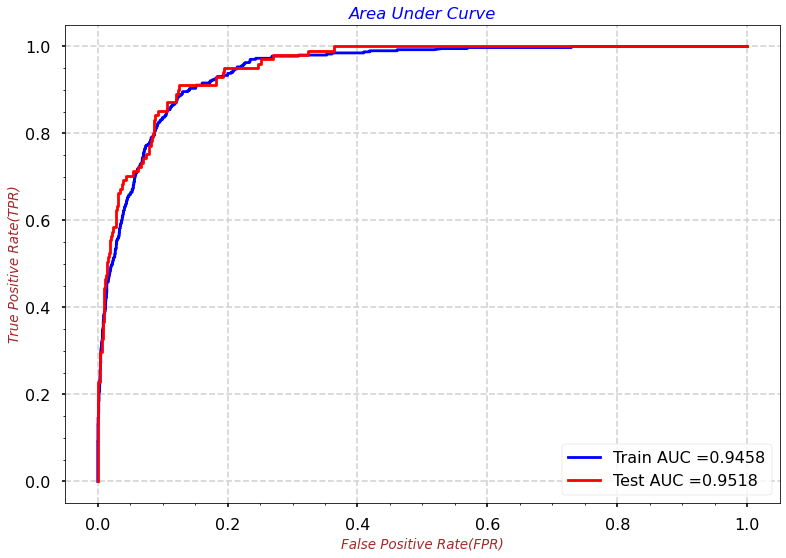

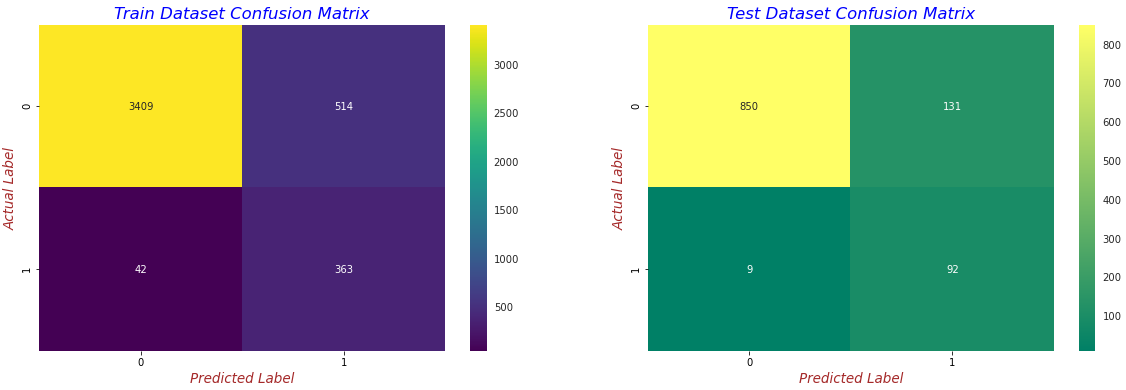



### Best Threshold = 0.5390
### Model AUC is : 0.9518
### Model Train F1 Score is : 0.5663
### Model Test F1 Score is : 0.5679


In [104]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [105]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.012603
1,DeductibleAmtPaid,0.028761
2,RenalDiseaseIndicator,0.000322
3,ChronicCond_ObstrPulmonary,0.000937
4,ChronicCond_Diabetes,0.000268


In [106]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

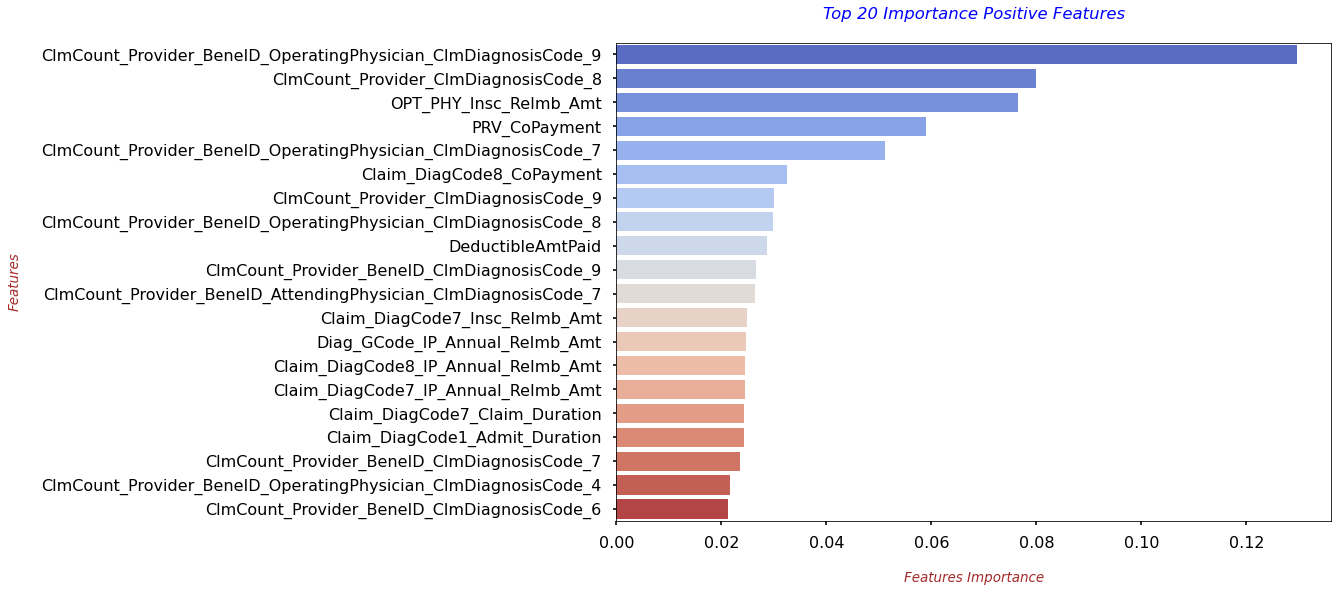

In [107]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

### **`Using Minority Synthetic Oversampling`**

#### **`Train Test Split` :: Creating TRAIN and VALIDATION sets.**

   * **`Reasoning`** :: These sets will be used for measurng the performance of ML Models.

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, stratify=y, random_state=39)

In [ ]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4057, 299), (1353, 299), (4057,), (1353,))

In [ ]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3678
1     379
Name: PotentialFraud, dtype: int64

In [ ]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    1226
1     127
Name: PotentialFraud, dtype: int64

#### **`Standardizing the TRAIN & TEST sets` :: Bringing every feature into the same scale.**

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [ ]:
from collections import Counter

In [ ]:
# BEFORE Oversampling :: Checking the percentage share of fraud and non-fraud records in the TRAIN set
counter = Counter(y_train)
counter

Counter({0: 3678, 1: 379})

In [ ]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.34% and Non-Fraud Percentage = 90.66%


In [ ]:
# Performing minority oversampling
from imblearn.over_sampling import ADASYN

In [ ]:
oversample = ADASYN(sampling_strategy=0.35, n_neighbors=12)
X_train_ovsamp, y_train_ovsamp = oversample.fit_resample(X_train_std, y_train)

X_train_ovsamp.shape, y_train_ovsamp.shape

((4983, 299), (4983,))

In [ ]:
counter = Counter(y_train_ovsamp)
counter

Counter({0: 3678, 1: 1305})

In [ ]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 26.19% and Non-Fraud Percentage = 73.81%


#### **`4. Logistic Regression`**

In [ ]:
# Training the model with all features and hyper-parameterized values
log_reg_4 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, 
                               solver='liblinear', 
                               tol=0.0001, 
                               max_iter=500, 
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_4.fit(X_train_ovsamp, y_train_ovsamp)

LogisticRegression(C=0.0316228, intercept_scaling=1.0, max_iter=500,
                   penalty='l1', random_state=49, solver='liblinear')

### Train AUC = 0.9436946199729571
### Test AUC = 0.9414522613710807


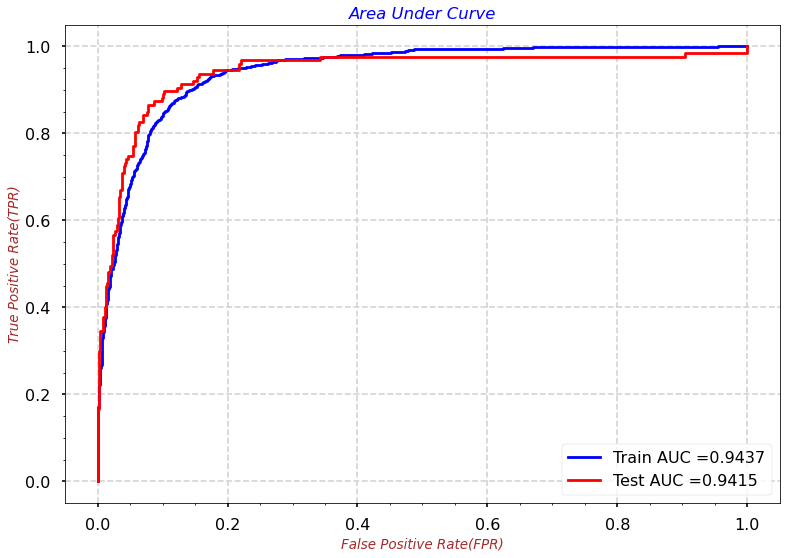

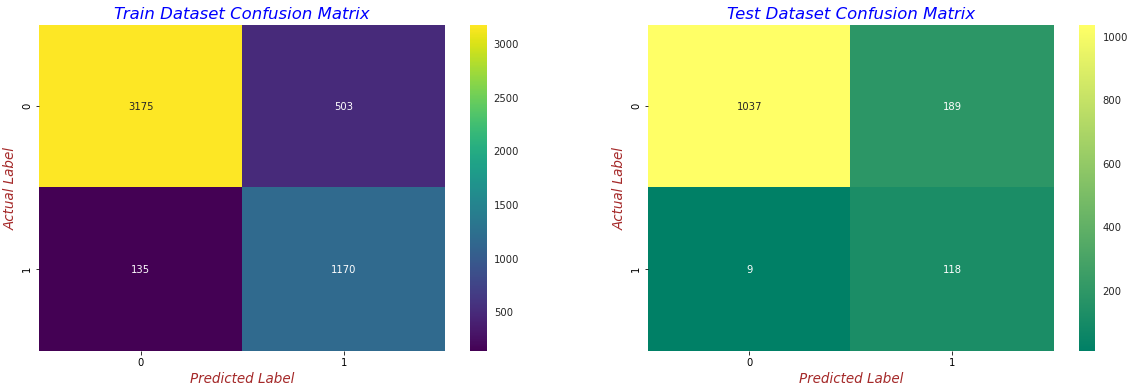



### Best Threshold = 0.1938
### Model AUC is : 0.9415
### Model Train F1 Score is : 0.7858
### Model Test F1 Score is : 0.5438


In [ ]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_4, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_4.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.832464
1,ChronicCond_stroke,0.073378
2,Admitted_Duration,0.500604
3,PRV_Tot_DGrpCodes,-0.008056
4,PRV_Tot_Unq_DOB_Years,-0.377293


In [ ]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [ ]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

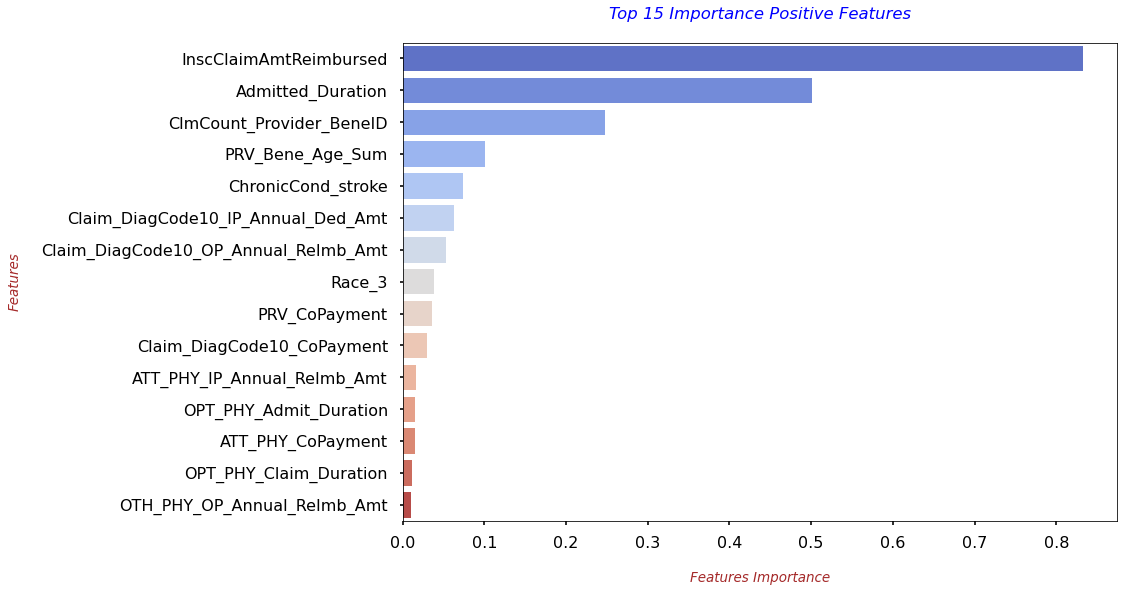

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

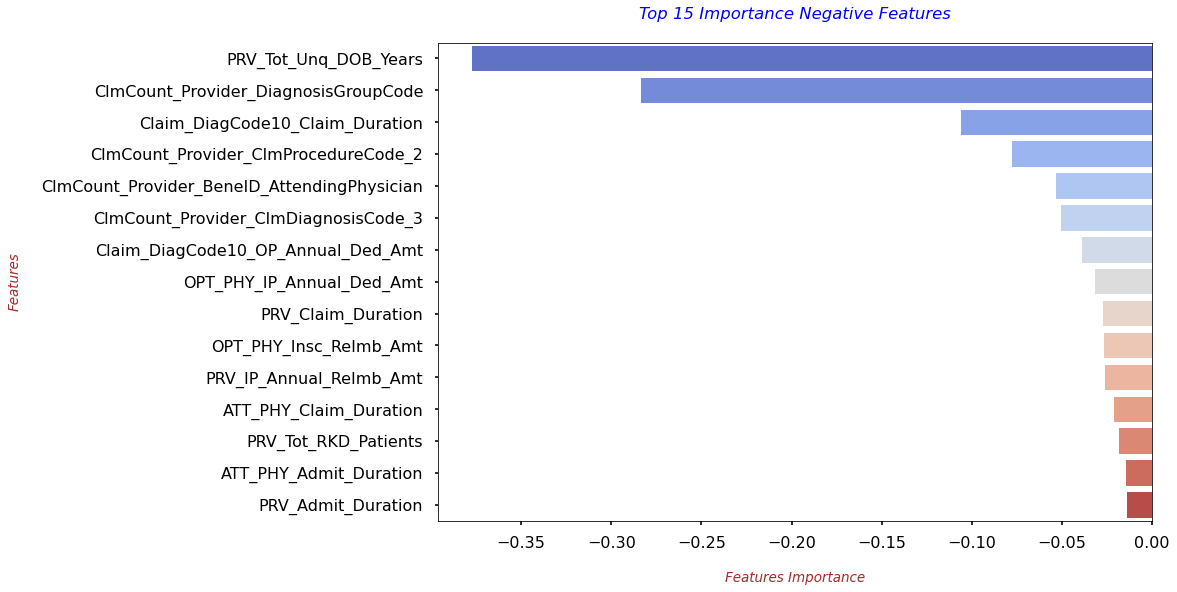

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Negative Features\n", fontdict=title_font_dict)

#### **`5. Decision Tree`**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Training the model with all features and hyper-parameterized values
dec_tree_5 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

dec_tree_5.fit(X_train_ovsamp, y_train_ovsamp)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9261928126022181
### Test AUC = 0.9350843277543


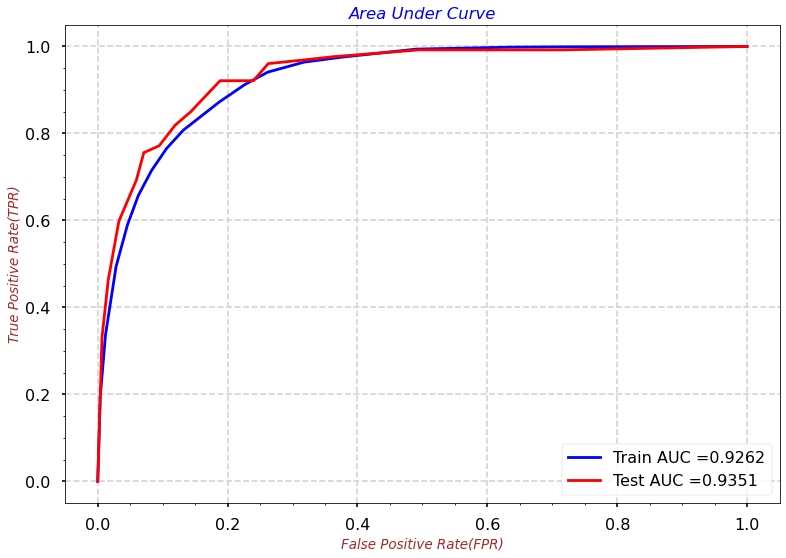

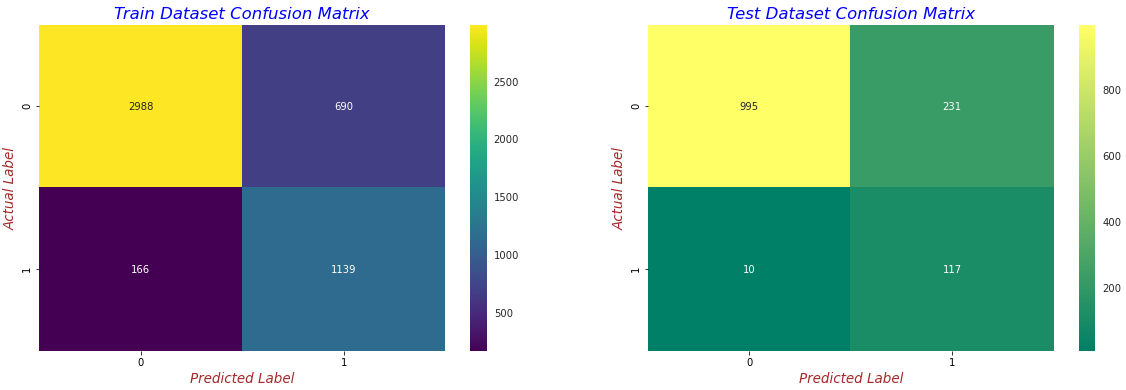



### Best Threshold = 0.2931
### Model AUC is : 0.9351
### Model Train F1 Score is : 0.7269
### Model Test F1 Score is : 0.4926


In [ ]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_5, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_5.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,DeductibleAmtPaid,0.126975
1,OPT_PHY_Admit_Duration,0.001224
2,OTH_PHY_OP_Annual_ReImb_Amt,0.001040
3,Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt,0.637895
4,Claim_DiagCode3_OP_Annual_Ded_Amt,0.000073


In [ ]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

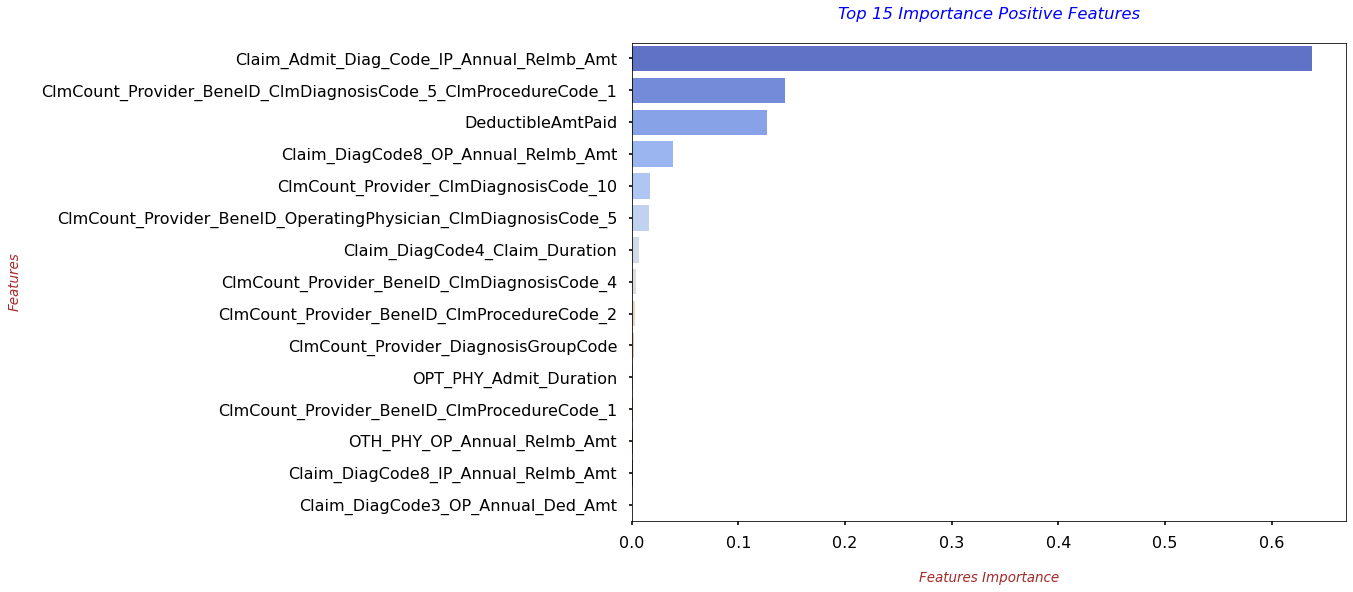

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

#### **`6. Random Forest Classifier`**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Training the model with all features and hyper-parameterized values
rfc_6 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   ccp_alpha=0.0,)

rfc_6.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9272309830221739
### Test AUC = 0.9487289822866759


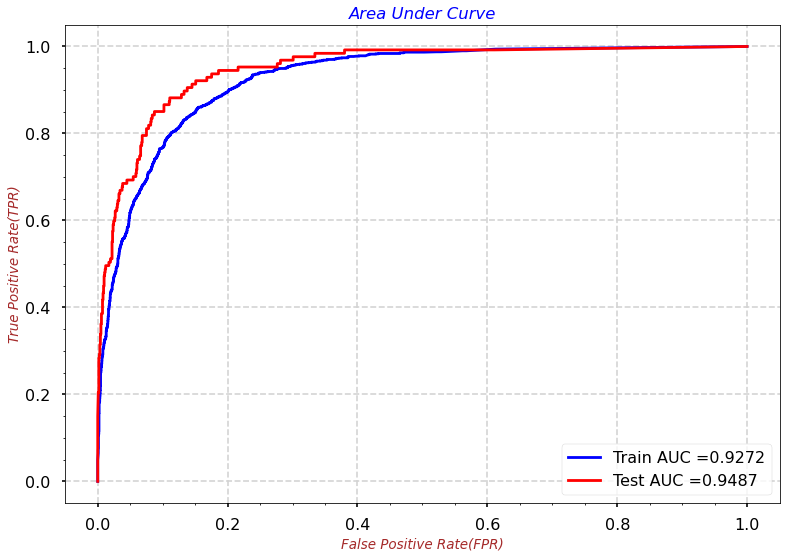

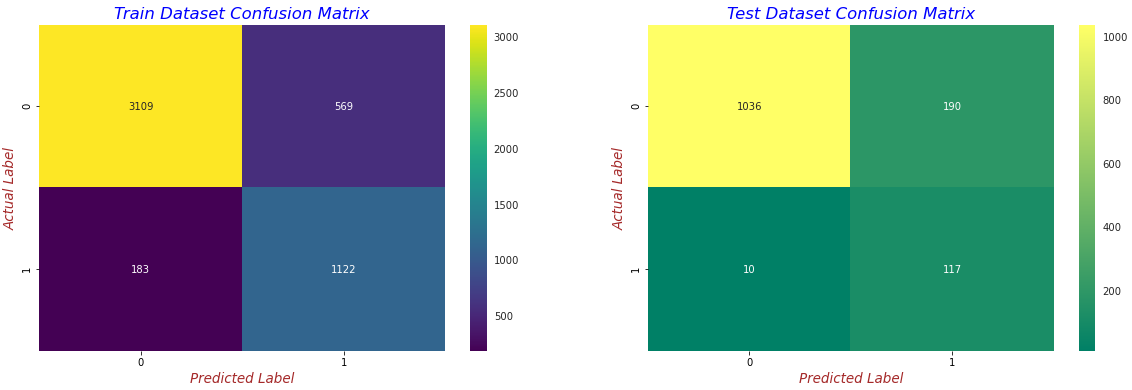



### Best Threshold = 0.1080
### Model AUC is : 0.9487
### Model Train F1 Score is : 0.7490
### Model Test F1 Score is : 0.5392


In [ ]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_6, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_6.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.032471
1,DeductibleAmtPaid,0.005630
2,RenalDiseaseIndicator,0.000265
3,ChronicCond_Alzheimer,0.000079
4,IPAnnualReimbursementAmt,0.003554


In [ ]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

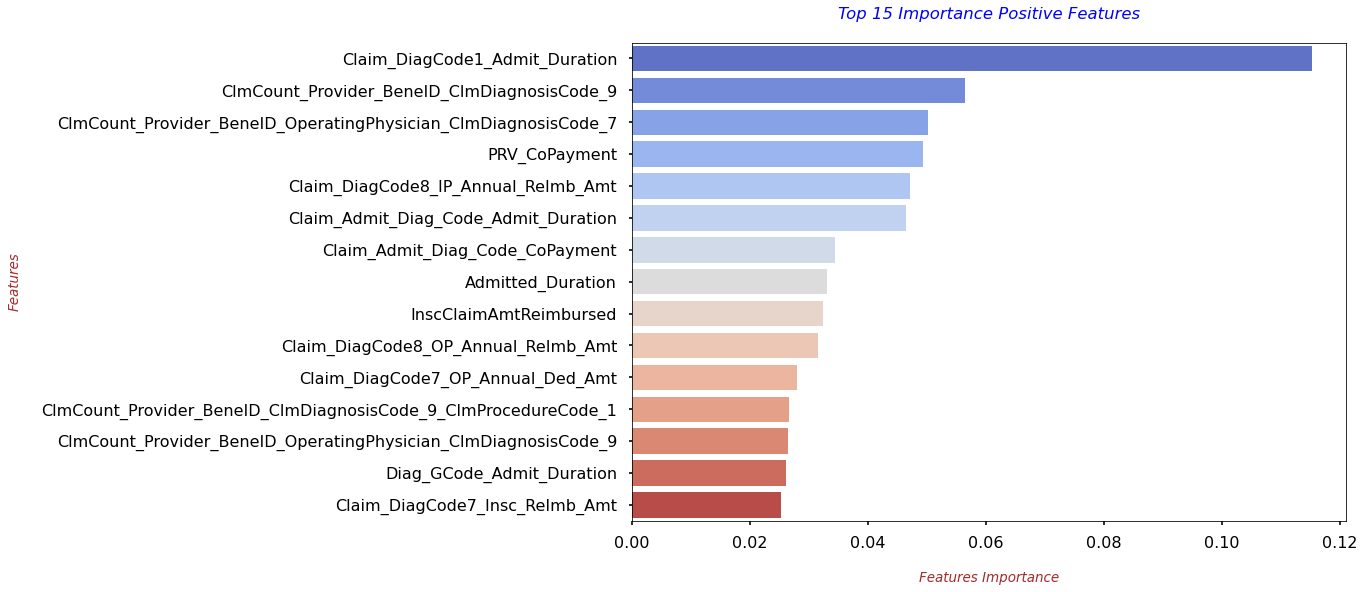

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

## **`RESULTS`**
- Best peforming model highlighted in light yellow in the below table.

<img src="Models_Set_1_Results.png" alt="drawing" width="1150"/>

## **`OBSERVATIONS`**

- **Adding Aggregated features at below mentioned levels certainly helped in achieving the good performance scores.**
    - Provider
    - Beneficiary
    - Attending Physician
    - Operating Physician
    - Other Physician and etc..
    
    
- **Adding below mentioned Aggregated features in order to capture the interactions b/w the different parties involved in the CLAIM process certainly helped in achieving the good performance scores.**  
    - PROVIDER <--> BENE <--> PHYSICIANS
    - PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES
    - PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES
    - PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES
    - PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES
    - PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES
    - PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES
    - PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES and etc..
    

- **Doing the synthetic oversampling of the minority class doesn't provide gain in the model's performance whehreas we can see a slight drop in the performace.** 

### **`Referred Links`**

- https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/notebook

- https://medium.com/analytics-vidhya/healthcare-provider-fraud-detection-analysis-using-machine-learning-81ebf09ed955

- https://www.icd10data.com/ICD10CM/Codes

- https://www.icd10data.com/ICD10CM/DRG

- https://www.plasticsurgery.org/Documents/Health-Policy/Coding-Payment/ICD-10/icd-10-medical-diagnosis-codes.pdf

- https://ftp.cdc.gov/pub/health_statistics/nchs/publications/ICD10CM/2019/icd10cm_tabular_2019.pdf


- Very imp link :: Also downloaded files :: https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes

- https://www.cms.gov/Medicare/Coding/OutpatientCodeEdit/Downloads/ICD-10-IOCE-Code-Lists.pdf

- https://medicaid.utah.gov/Documents/pdfs/ClaimDenialCodes.pdf

- https://www.cms.gov/Medicare/Coding/OutpatientCodeEdit/Downloads/ICD-10-IOCE-Code-Lists.pdf

- DRG :: https://www.findacode.com/code-set.php?set=DRG
